In [17]:
install.packages("qgraph")

Installing package into 'C:/Users/fjsae/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependencies 'tmvnsim', 'checkmate', 'htmlwidgets', 'mnormt', 'pbivnorm', 'numDeriv', 'Formula', 'latticeExtra', 'gridExtra', 'htmlTable', 'viridis', 'psych', 'lavaan', 'Hmisc', 'igraph', 'jpeg', 'png', 'corpcor', 'glasso', 'fdrtool', 'pbapply', 'abind'




package 'tmvnsim' successfully unpacked and MD5 sums checked
package 'checkmate' successfully unpacked and MD5 sums checked
package 'htmlwidgets' successfully unpacked and MD5 sums checked
package 'mnormt' successfully unpacked and MD5 sums checked
package 'pbivnorm' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked
package 'lavaan' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'png' suc

In [30]:
library(gplots)
library(qgraph)
library(tidyverse)
library("RColorBrewer")

In [1]:
# http://cardsorting.net/tutorials/25.csv

data <- read.csv(url("http://cardsorting.net/tutorials/25.csv"))

In [2]:
unique(data[c("Category")])

,Category
,<chr>
1,Sides
2,meat
3,dinners
4,Snacks
5,breakfasat
6,Fruit and veggie
7,Drinks
8,fruits
9,beverages


In [3]:
head(data)

,Uniqid,Category,Startdate,Starttime,Endtime,QID,Carrots,Apple,Banana,Bread,...,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt,Comment
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,2249,Sides,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,1,...,1,0,0,0,0,0,0,0,0,NA
2,2249,meat,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,...,0,1,0,0,1,0,0,0,0,NA
3,2249,dinners,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NA
4,2249,Snacks,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NA
5,2249,breakfasat,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NA
6,2249,Fruit and veggie,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,1,1,1,0,...,0,0,0,0,0,0,0,1,0,NA


In [4]:
data <- data[, -c(1:6)]# delete columns 1 through 6
data <- data[,-ncol(data)]

In [5]:
head(data)

,Carrots,Apple,Banana,Bread,Broccoli,Butter,Cake,Cereal,Cheese,Chicken,...,Pretzels,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
data <- data.frame(data)

In [7]:
typeof(data)

[1] "list"

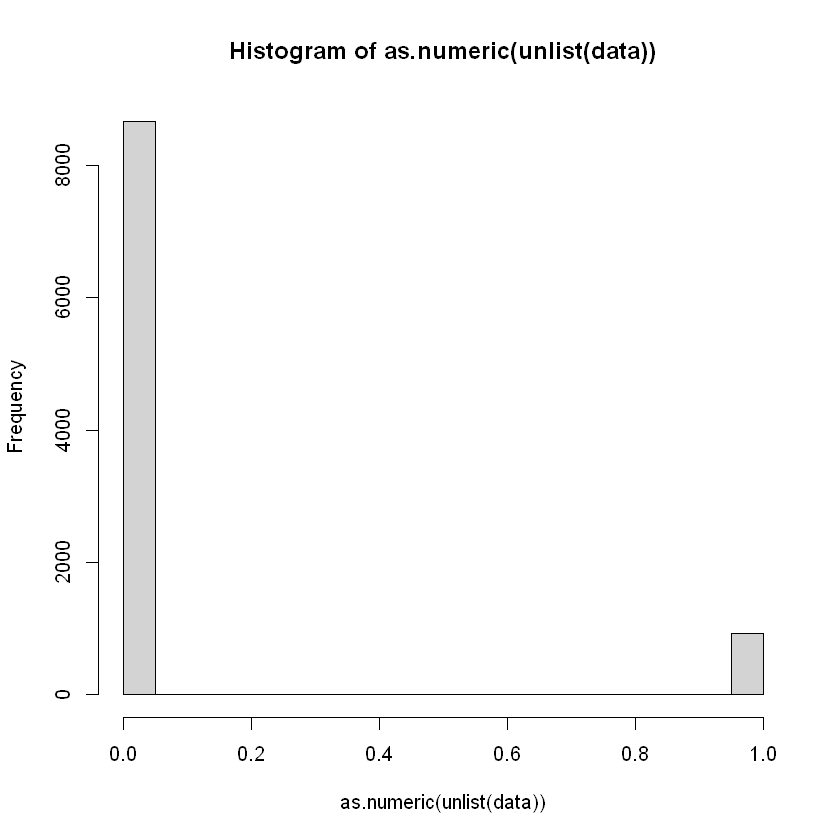

In [8]:
hist(as.numeric(unlist(data)), labels=c(0,1))

In [11]:
as.character(unique(unlist(data)))

[1] "0" "1"

In [12]:
distances = dist(t(data),method="euclidean")

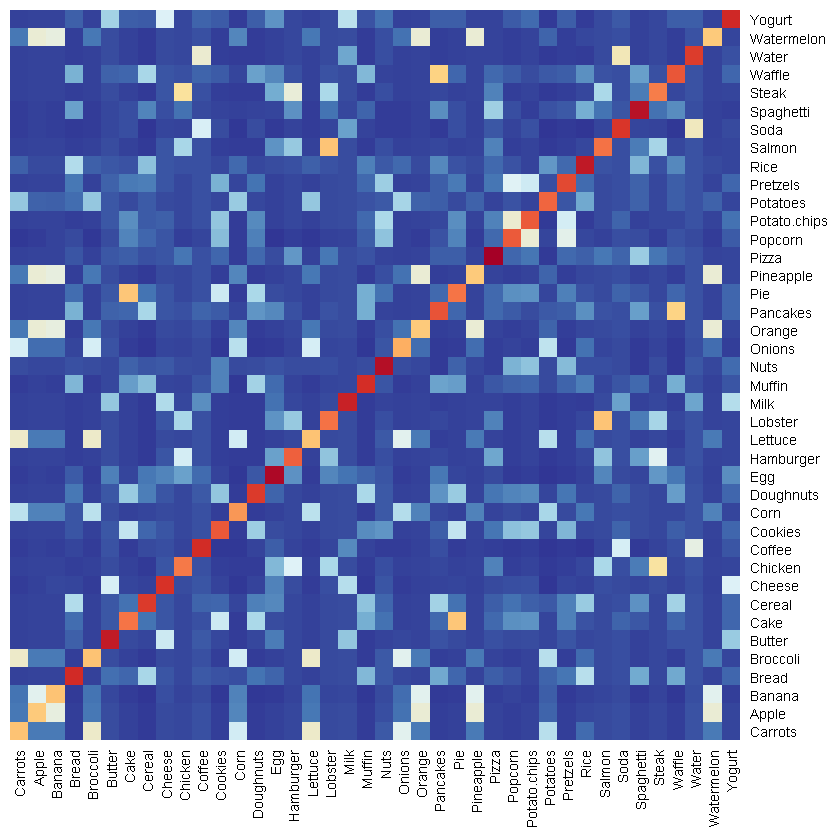

In [31]:
# Establecemos Colv = Rowv = NA para eliminar los dendogramas
col <- colorRampPalette(brewer.pal(10, "RdYlBu"))(256)
heatmap(as.matrix(distances),Colv= NA, Rowv = NA,scale="column",col = col)

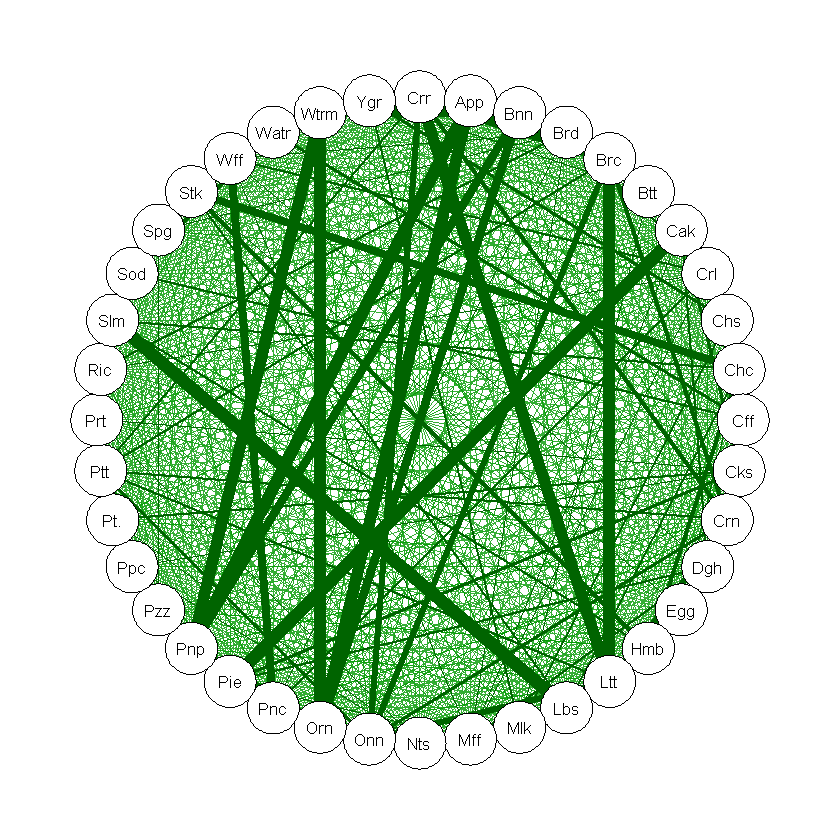

In [33]:
qgraph(1/distances)